In [39]:
from bertopic import BERTopic
import pandas as pd
import os
import matplotlib.pyplot as plt
from bertopic.representation import KeyBERTInspired

In [40]:
# Corpus and dictionary files to use
corpus_file = '../../data/democracy_reports_corpus_merged_210524.xlsx'

In [41]:
# Download datsets if not already downloaded
if not os.path.exists(corpus_file):
    print(f'Corpus file not found {corpus_file}')

In [42]:
# load data setof all countries, years and sources
all_countries_data = pd.read_excel(corpus_file)
all_countries_data['sentence'] = all_countries_data['sentence'].astype(str)
df = pd.DataFrame(all_countries_data)
amb_df = df[df['correct dimension'] == 'ambiguous']
amb_df = amb_df.reset_index(drop=True)

In [43]:
# Prepare embeddings
from sentence_transformers import SentenceTransformer
docs = amb_df.sentence
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")

# Use KeyBERTInspired representation model. 
# This gives better names to the topics.
representation_model = KeyBERTInspired()
embeddings = sentence_model.encode(docs, show_progress_bar=True)

Batches:   0%|          | 0/17 [00:00<?, ?it/s]

In [34]:
# load BERT model paraphrase-MiniLM-L3-v2 (multilingual) or all-MiniLM-L6-v2 (english)
# ADJUST minimum topic size and max ngrams
MIN_TOPIC_SIZE = 10
MAX_NGRAM = 2
topic_model = BERTopic(representation_model=representation_model,  
                       verbose=True, 
                       embedding_model='all-MiniLM-L6-v2', 
                       min_topic_size = MIN_TOPIC_SIZE, 
                       n_gram_range=(1, MAX_NGRAM)
                      ).fit(docs, embeddings)

2024-05-27 17:14:22,618 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-05-27 17:14:23,718 - BERTopic - Dimensionality - Completed ✓
2024-05-27 17:14:23,718 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-05-27 17:14:23,728 - BERTopic - Cluster - Completed ✓
2024-05-27 17:14:23,729 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-05-27 17:14:24,380 - BERTopic - Representation - Completed ✓


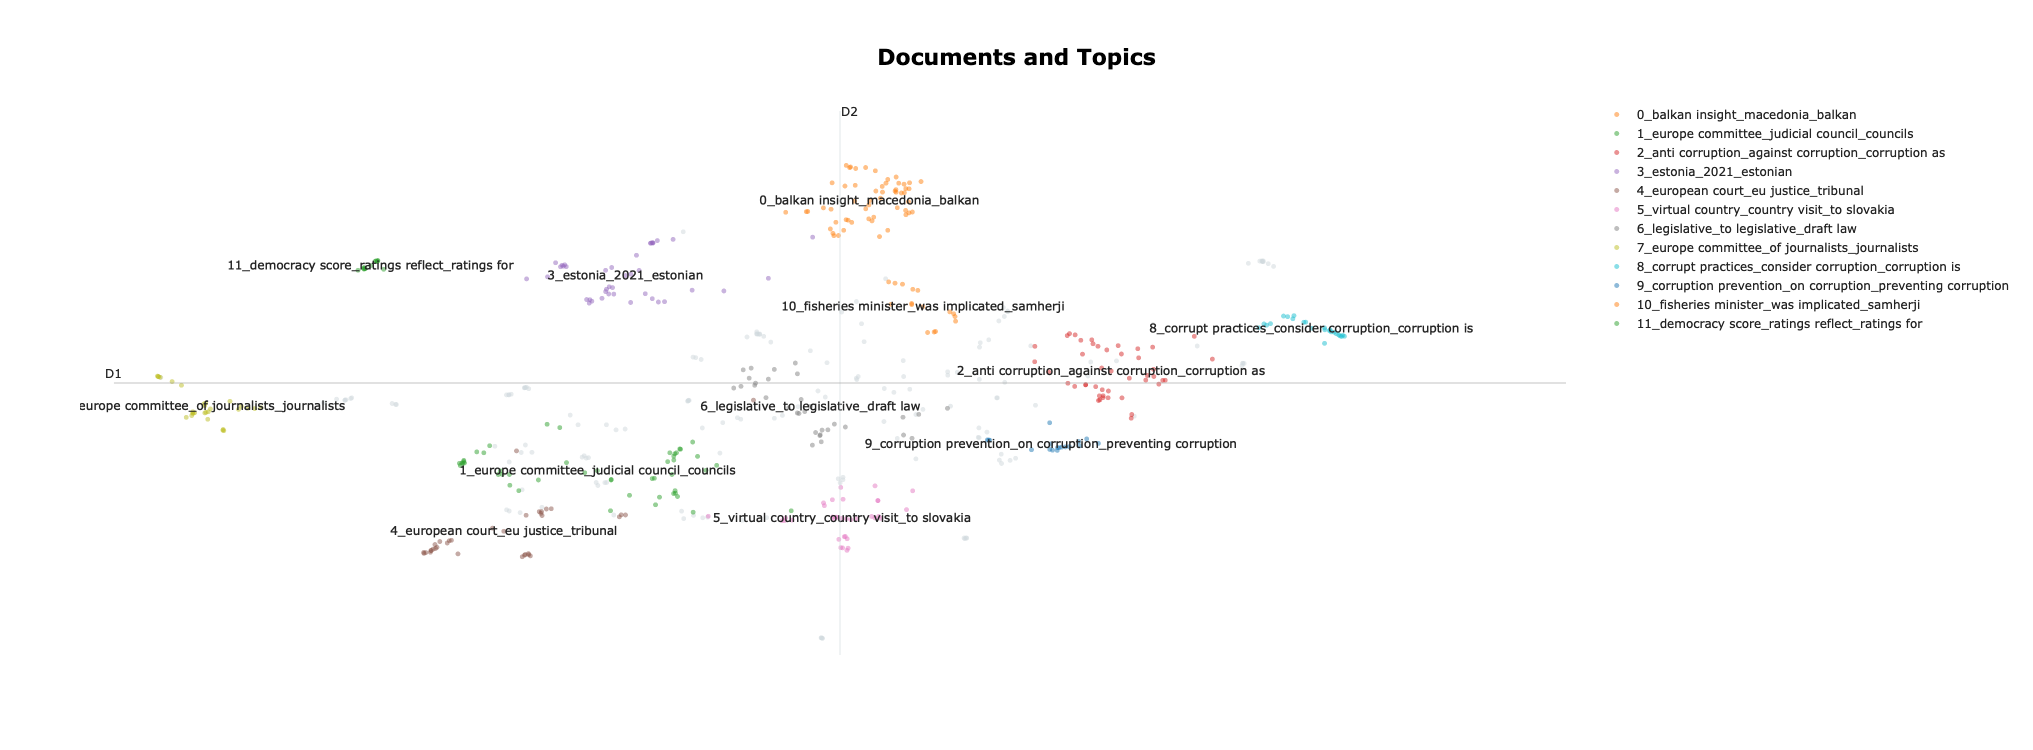

In [35]:
topic_model.visualize_documents(docs, embeddings=embeddings)

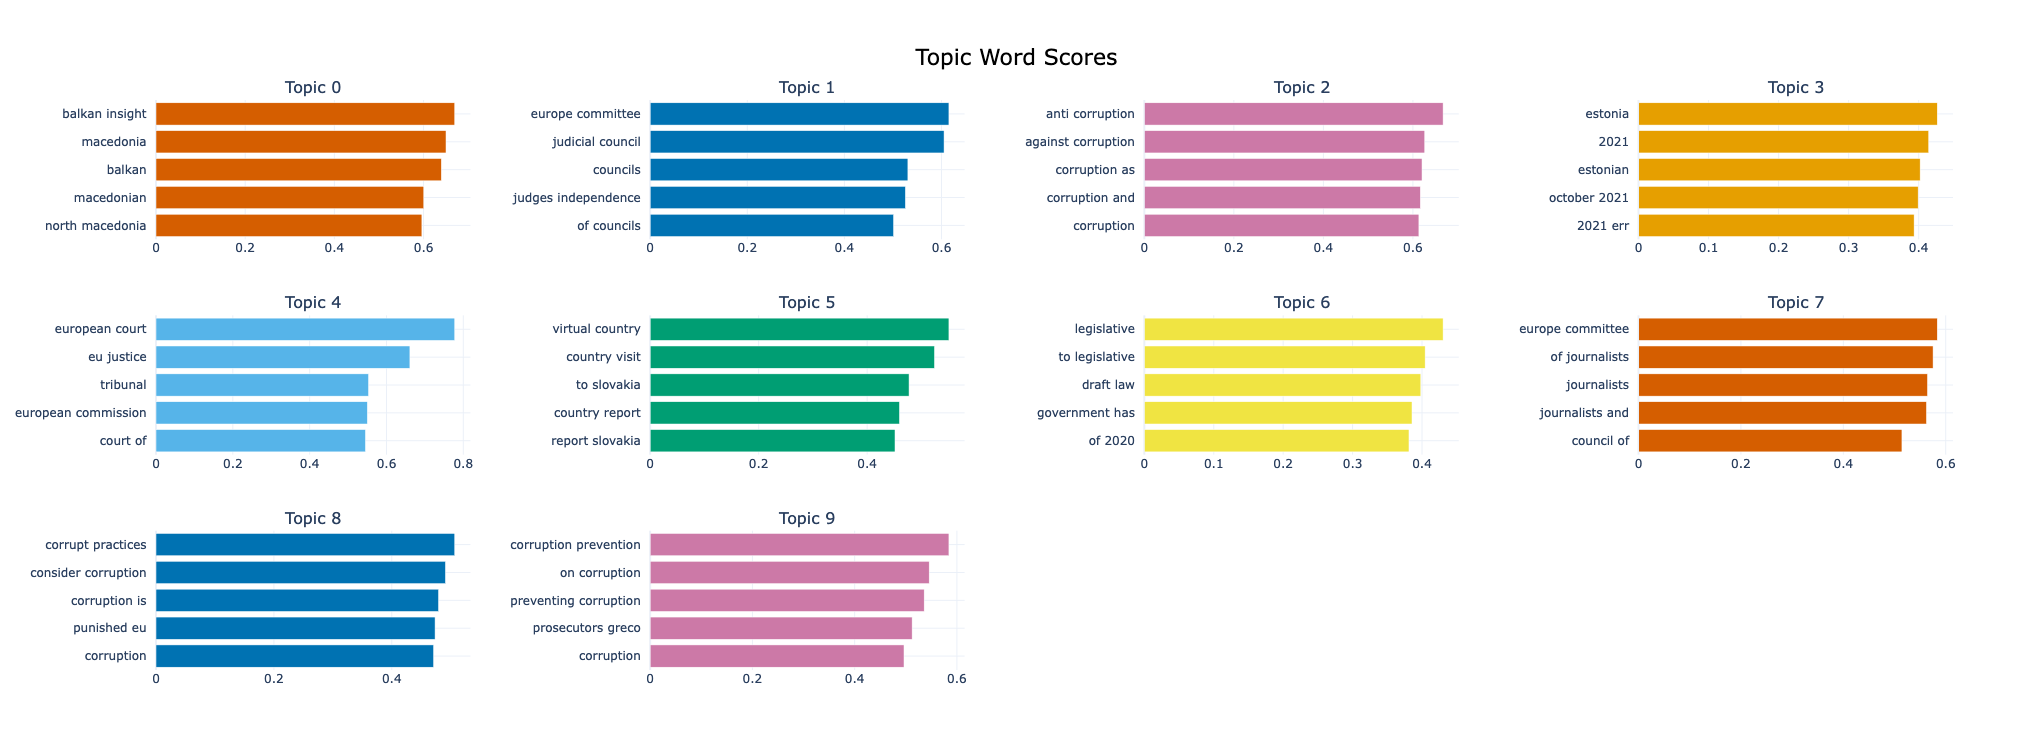

In [36]:
# visualize topic words/n_grams
fig = topic_model.visualize_barchart(top_n_topics=10)
fig.show()

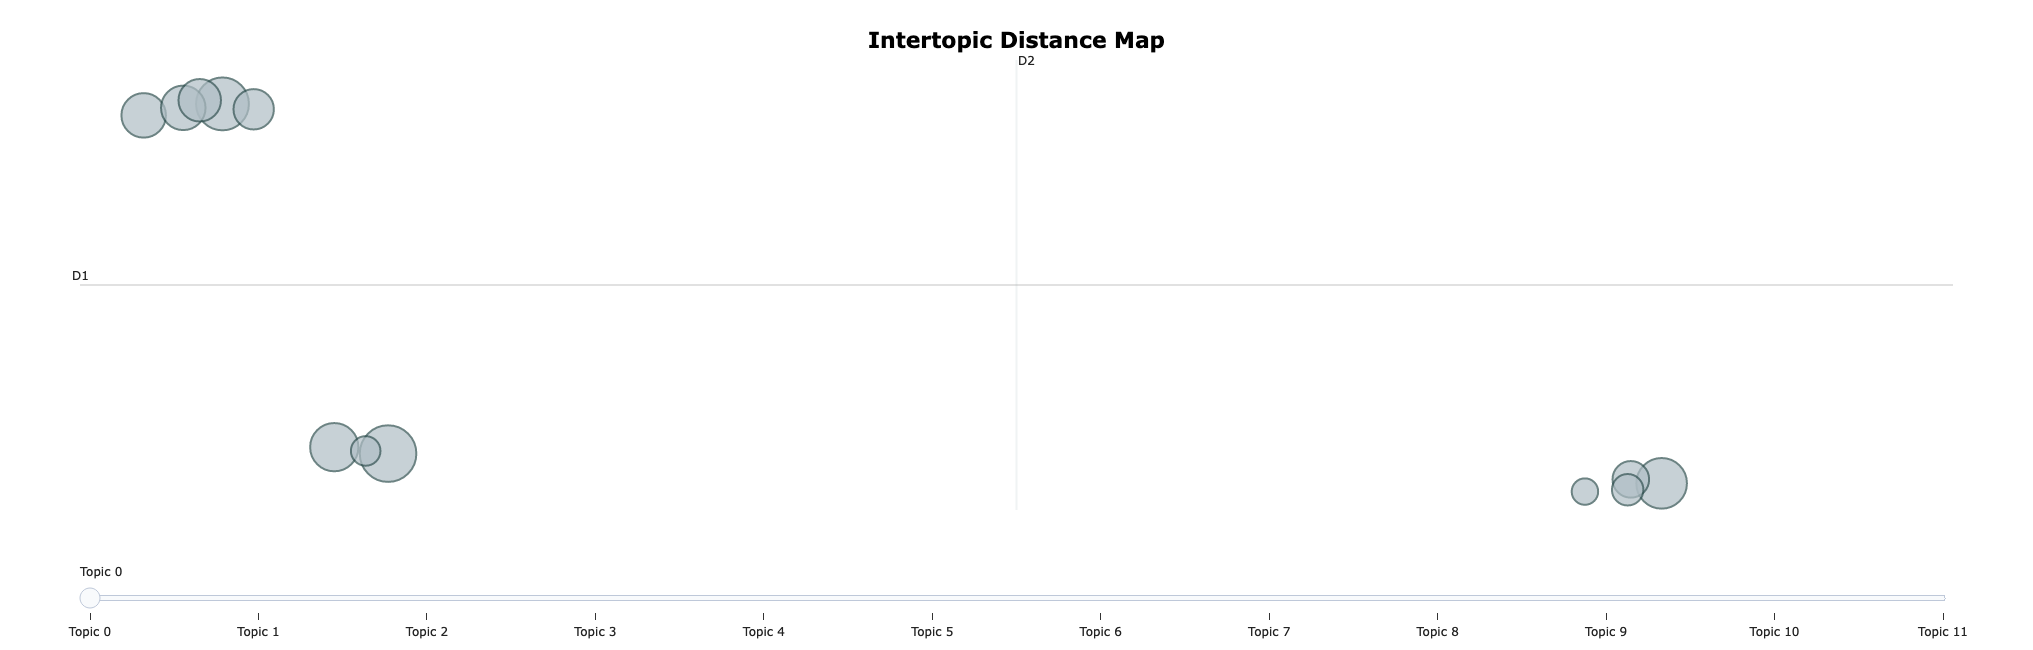

In [37]:
topic_model.visualize_topics()

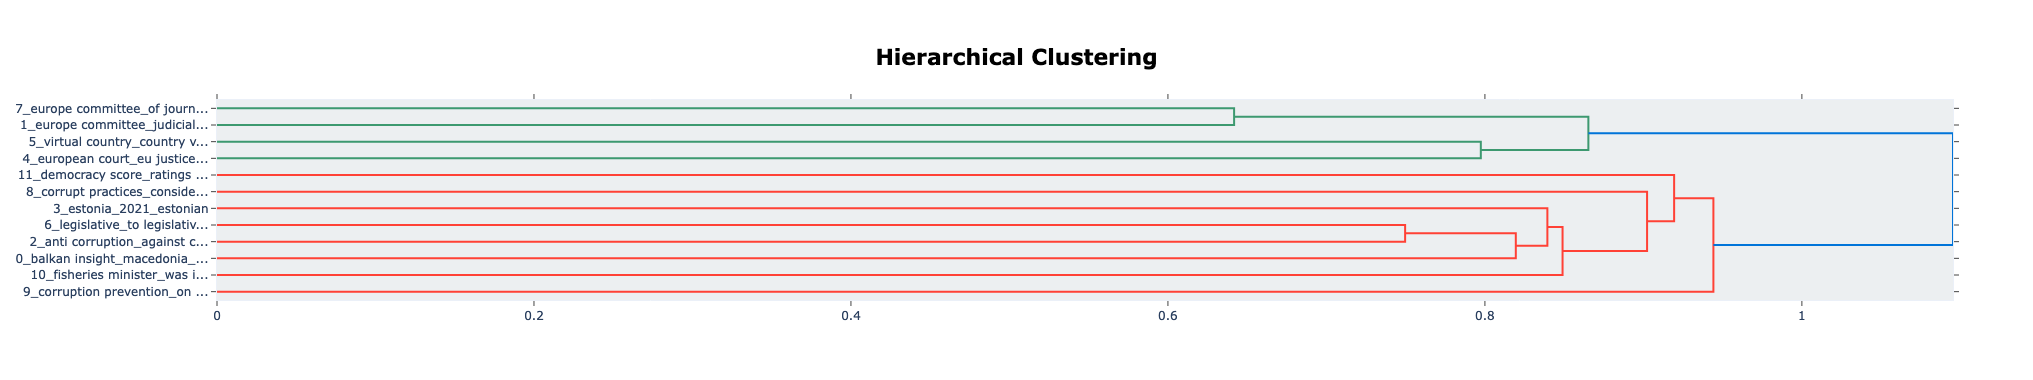

In [38]:
# visualize topic clusters
topic_model.visualize_hierarchy(top_n_topics=30)